# LOAD MODELS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from nidocr.model import OCR
ocr=OCR("models")

Segmentation Models: using `tf.keras` framework.
#LOG     :Loaded Detection Model,craft
#LOG     :Detector Loaded
#LOG     :Detector Initialized
#LOG     :Label len:80
#LOG     :Vocab len:1504
#LOG     :Pad Value:1506
#LOG     :Start End:1505
#LOG     :encm loaded
#LOG     :seqm loaded
#LOG     :posm loaded
#LOG     :fusm loaded
#LOG     :Recognizer Loaded


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :Recognizer Initialized
#LOG     :Face Matcher Initialized


# Start

#LOG     :------------------------------------------------
#LOG     :Data
#LOG     :------------------------------------------------


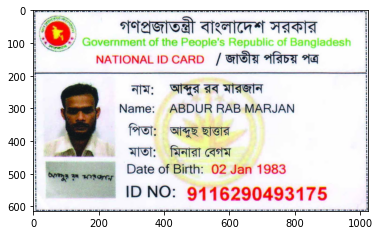

In [4]:
from nidocr.utils import *
from nidocr.data  import card
card_type="nid"
if card_type=="nid":
    src=card.nid.front
    region_dict=card.nid.front.box_dict
else:
    src=card.smart.front
    region_dict=card.smart.front.box_dict
img=cv2.imread(f"tests/{card_type}.png")
display_data("Data",img)

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :------------------------------------------------
#LOG     :face
#LOG     :------------------------------------------------


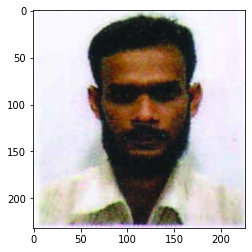

#LOG     :------------------------------------------------
#LOG     :sign
#LOG     :------------------------------------------------


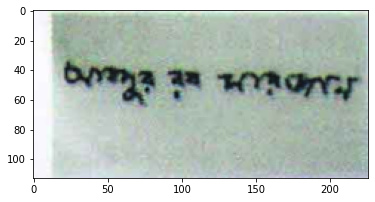

,box,field,text
0,"[411, 204, 516, 267]",Bangla Name,আব্দুর
1,"[518, 203, 579, 263]",Bangla Name,রব
2,"[582, 203, 715, 263]",Bangla Name,মারজান
3,"[409, 266, 555, 327]",English Name,abdur
4,"[559, 267, 645, 328]",English Name,rab
5,"[647, 268, 813, 329]",English Name,marjan
6,"[412, 338, 512, 397]",Fathers Name,আব্দুছ
7,"[516, 341, 613, 397]",Fathers Name,ছাত্তার
8,"[412, 403, 523, 455]",Mothers Name,মিনারা
9,"[528, 404, 618, 454]",Mothers Name,বেগম


In [5]:
face,sign,data=ocr.extract(img,card_type)
display_data("face",face,cv_color=False)
display_data("sign",sign,cv_color=False)
data

In [ ]:
from nidocr.segment import *
mod=Extractor("models/segment.h5")


In [ ]:
itype,img=mod.process("tests/nid1.jpg")
itype


In [ ]:
pred=mod.model.predict(data)

In [ ]:
pred[0][0]

In [ ]:
plt.imshow(pred[1][0])

In [ ]:
h,w,d=org.shape
p=pred[1][0]
card_map=cv2.resize(p,(w,h))


In [ ]:
y_min,y_max,x_min,x_max=locateData(card_map,0)
org=org[y_min:y_max,x_min:x_max]
card_map=card_map[y_min:y_max,x_min:x_max]
plt.imshow(card_map)        
         

In [ ]:
# find max contour (4 point)
contours, hierarchy = cv2.findContours(card_map.astype("uint8"), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cmax = max(contours, key = cv2.contourArea)
hull=cv2.convexHull(cmax)
for i in range(10):
    epsilon = (i+1)*0.01*cv2.arcLength(hull,True)
    approx = cv2.approxPolyDP(hull,epsilon,True)
    print(approx.shape)
    if approx.shape[-1]==4:
        break

approx=np.reshape(approx,(approx.shape[0],approx.shape[-1]))
approx=approx.astype("float32")
form=np.array([approx[0],approx[3],approx[2],approx[1]])
# warp
org=four_point_transform(org,form)
